In [232]:
from matplotlib import pyplot
import numpy as np

In [233]:
r1 = 2
r2 = 2
K1 = 200
K2 = 200

N1_starting = 100
N2_starting = 100

a12 = 1
a21 = 1

In [234]:
def dN1_dt(N1, N2):
    return r1 * N1 * (K1 - N1 - a12 * N2) / K1

def dN2_dt(N1, N2):
    return r2 * N2 * (K2 - N2 - a21 * N1) / K2

In [235]:
def show_competition_plot(dt = 0.05, t_steps = 500):
    T = np.linspace(0, dt*t_steps, t_steps)
    N1 = np.zeros(t_steps)
    N2 = np.zeros(t_steps)
    N1[0] = N1_starting
    N2[0] = N2_starting
    for t in range(1, t_steps):
        N1[t] = N1[t-1] + dN1_dt(N1[t-1], N2[t-1]) * dt
        N2[t] = N2[t-1] + dN2_dt(N1[t-1], N2[t-1]) * dt

    pyplot.plot(T, N1, label="First kind")
    pyplot.plot(T, N2, label="Second kind")
    pyplot.xlabel("t")
    pyplot.ylabel("N")
    pyplot.legend()
    pyplot.show()

In [236]:
def show_phase_portrait():
    critical_points = []
    critical_points.append((0, 0))
    critical_points.append((K1, 0))
    critical_points.append((0, K2))
    if(a12 * a21 != 1):
        critical_points.append(((K1-a12*K2) / (1 - a12 * a21), (K2 - a21*K1) / (1 - a12 * a21)))
        
    fig, axis = pyplot.subplots(1, len(critical_points))
    
    fig.set_figwidth(fig.get_figheight() * len(critical_points))
    
    for i in range(len(critical_points)):
        point_N1, point_N2 = critical_points[i]
        N1 = np.linspace(point_N1 - 50, point_N1 + 50)
        N2 = np.linspace(point_N2 - 50, point_N2 + 50)
        N1, N2 = np.meshgrid(N1, N2)
        U = dN1_dt(N1, N2)
        V = dN2_dt(N1, N2)
        axis[i].scatter(point_N1, point_N2, color='r')
        axis[i].streamplot(N1, N2, U, V, color='b')
        axis[i].set_xlabel("N1")
        axis[i].set_ylabel("N2")
        axis[i].title.set_text(f"Critical point\n({point_N1:.2f}, {point_N2:.2f})")
        


    pyplot.show()

In [237]:
def show_results():
    show_competition_plot()
    show_phase_portrait()

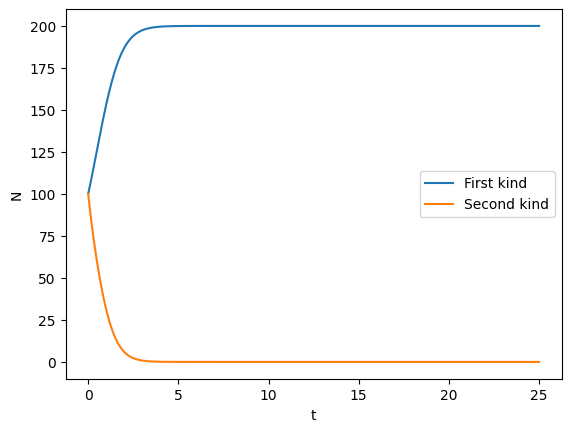

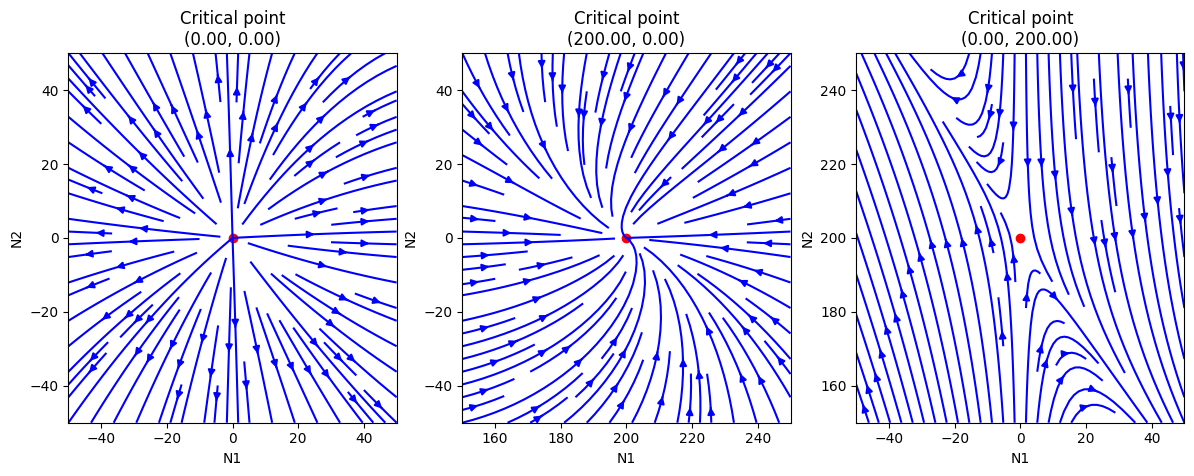

In [238]:
a12 = 0.5
a21 = 2
show_results()

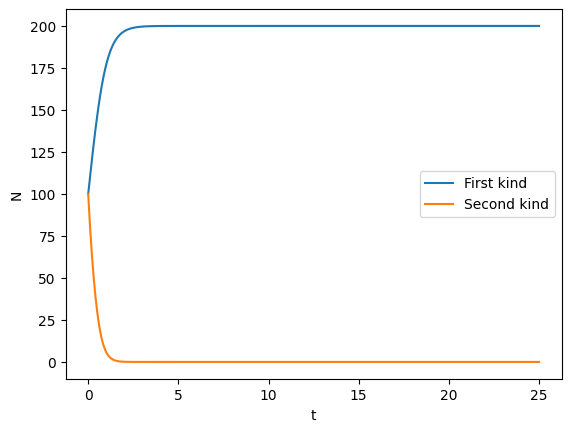

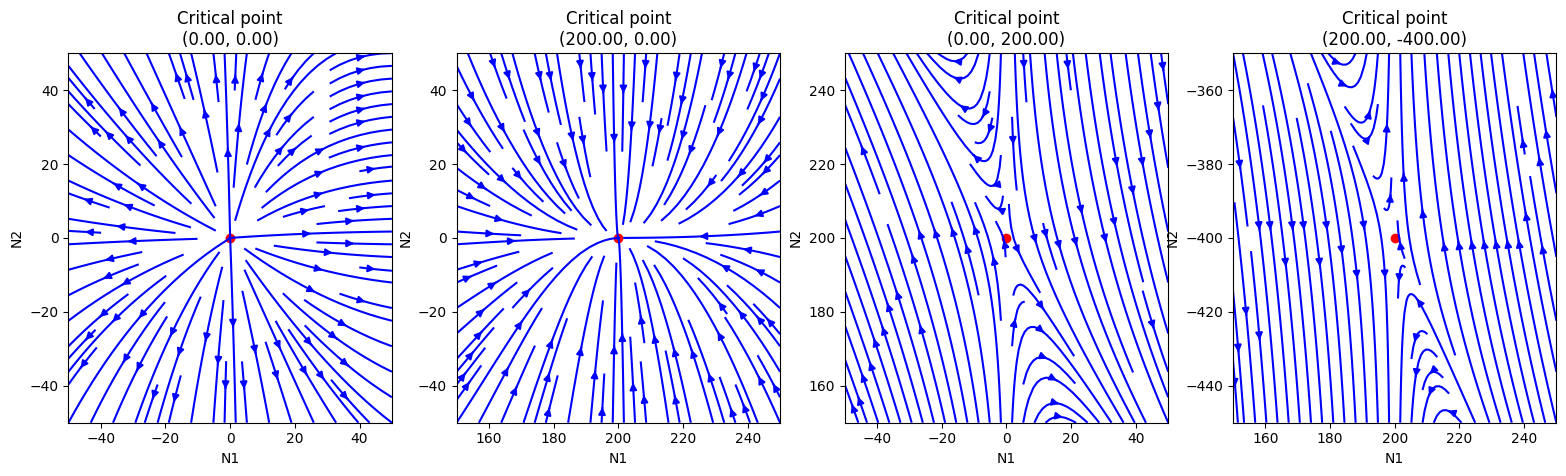

In [239]:
a12 = 0
a21 = 3
show_results()

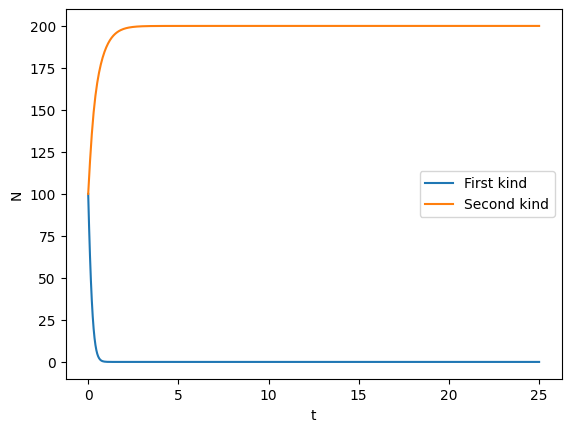

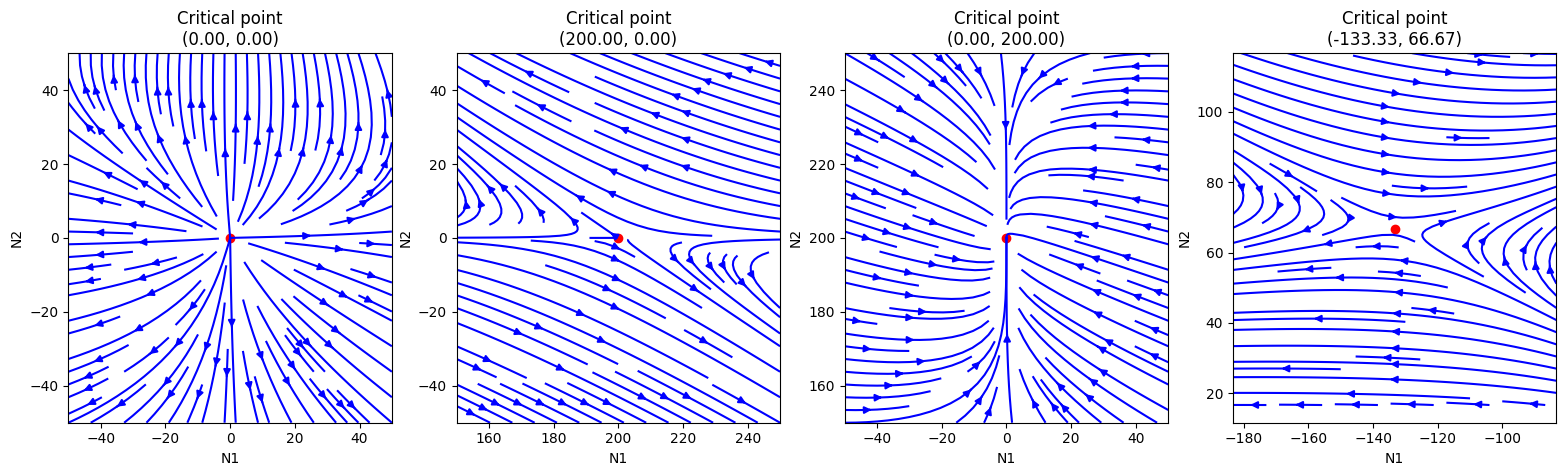

In [240]:
a12 = 5
a21 = -1
show_results()

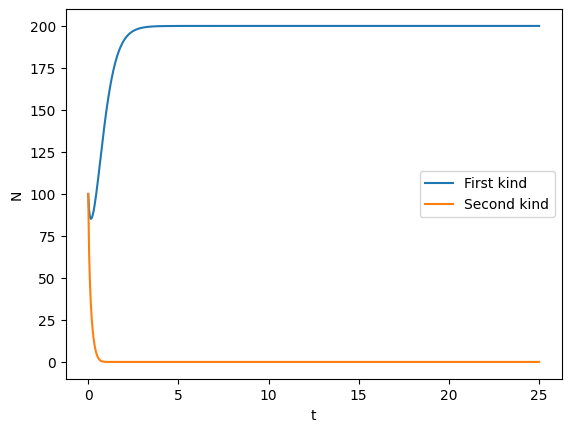

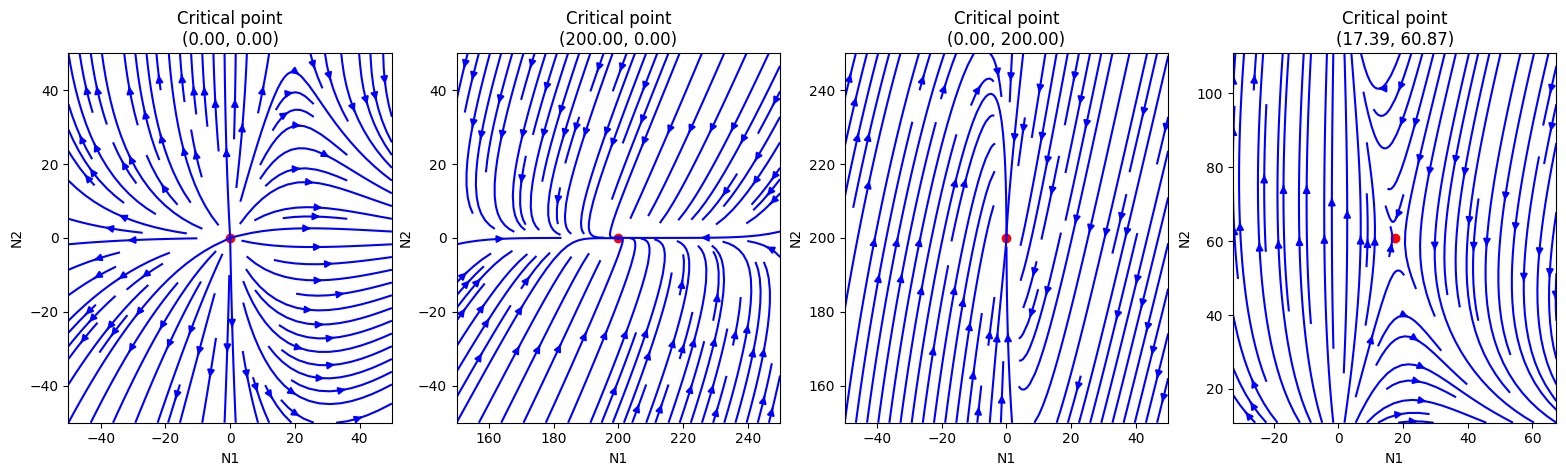

In [241]:
a12 = 3
a21 = 8
show_results()